In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing required libraries for Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1 Onboarding the data & create the data frame
df = pd.read_csv(r'E:\Python\AI&ML\SourceData\Salary_Data_slr.csv')

In [4]:
# 2 Exploratory Data Analysis (EDA)
# To see 1st five records of df
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# To see lsst five records of df
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
# To see the non-null count and data type of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
# To see the dimension (r x c) of df
df.shape

(30, 2)

In [8]:
# To see the minimal statistical report of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [9]:
# To see the null values of df
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
# To see the no.of duplicated records of df
df.duplicated().sum()

np.int64(0)

In [11]:
# To see the columns of df
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [12]:
# 3 Defining x, y variables
x = df.drop('Salary', axis=1)
y = df['Salary']

In [14]:
# 4 split train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


In [16]:
# 5 Define & create slr
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
# 6 Make prediction
y_pred = lr.predict(x_test)

In [19]:
# 7 y_test vs y_pred
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
27,112635.0,115790.210113
15,67938.0,71498.278095
23,113812.0,102596.868661
17,83088.0,75267.804224
8,64445.0,55477.792045
9,57189.0,60189.699707


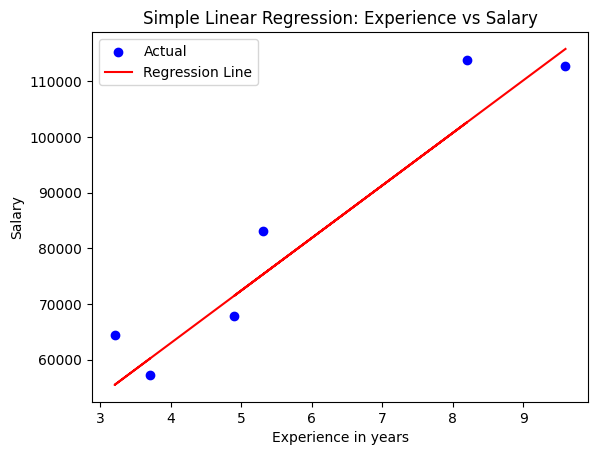

In [20]:
# 8 visualize the regression line
# Plot the actual data points
plt.scatter(x_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.title('Simple Linear Regression: Experience vs Salary')
plt.legend()
plt.show()

In [21]:
# 9 Evaluate the model
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
R-squared score: 0.9024461774180497


MAE[0, infinity) lower is better, It should ideally be < 10% of the average value of your target variable.

MSE[0, infinity) Lower is better, but it penalizes large errors more than MAE due to squaring.

Good R²(-inf, 1] R² Score Interpretation, 0.75–0.9 Good fit, 0.5–0.75 Moderate fit, < 0.5 Weak fit

0.9 Excellent fit (often overfitting, so check carefully)

Metric	        Goal	        Good Value (Rule of Thumb)

MAE	            Minimize	    < 10% of mean target

MSE	            Minimize	    Smaller is better, use RMSE for scale

R²	            Maximize	    > 0.75 (but depends on domain)


In [22]:
# 10 estimating future salaries for given experience
# estimating future salaries for given experience
futute_y_pred = lr.predict([[7], [12], [13]])
print(futute_y_pred)

[ 91288.29027299 138407.36688815 147831.18221118]
